# Linear and Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("diabetes.csv")

## Dataset Preprocessing

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
dataset.shape

(768, 9)

In [13]:
print(f'In the Data rows is {dataset.shape[0]} and column is {dataset.shape[1]}')

In the Data rows is 768 and column is 9


In [7]:
# No missing data
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


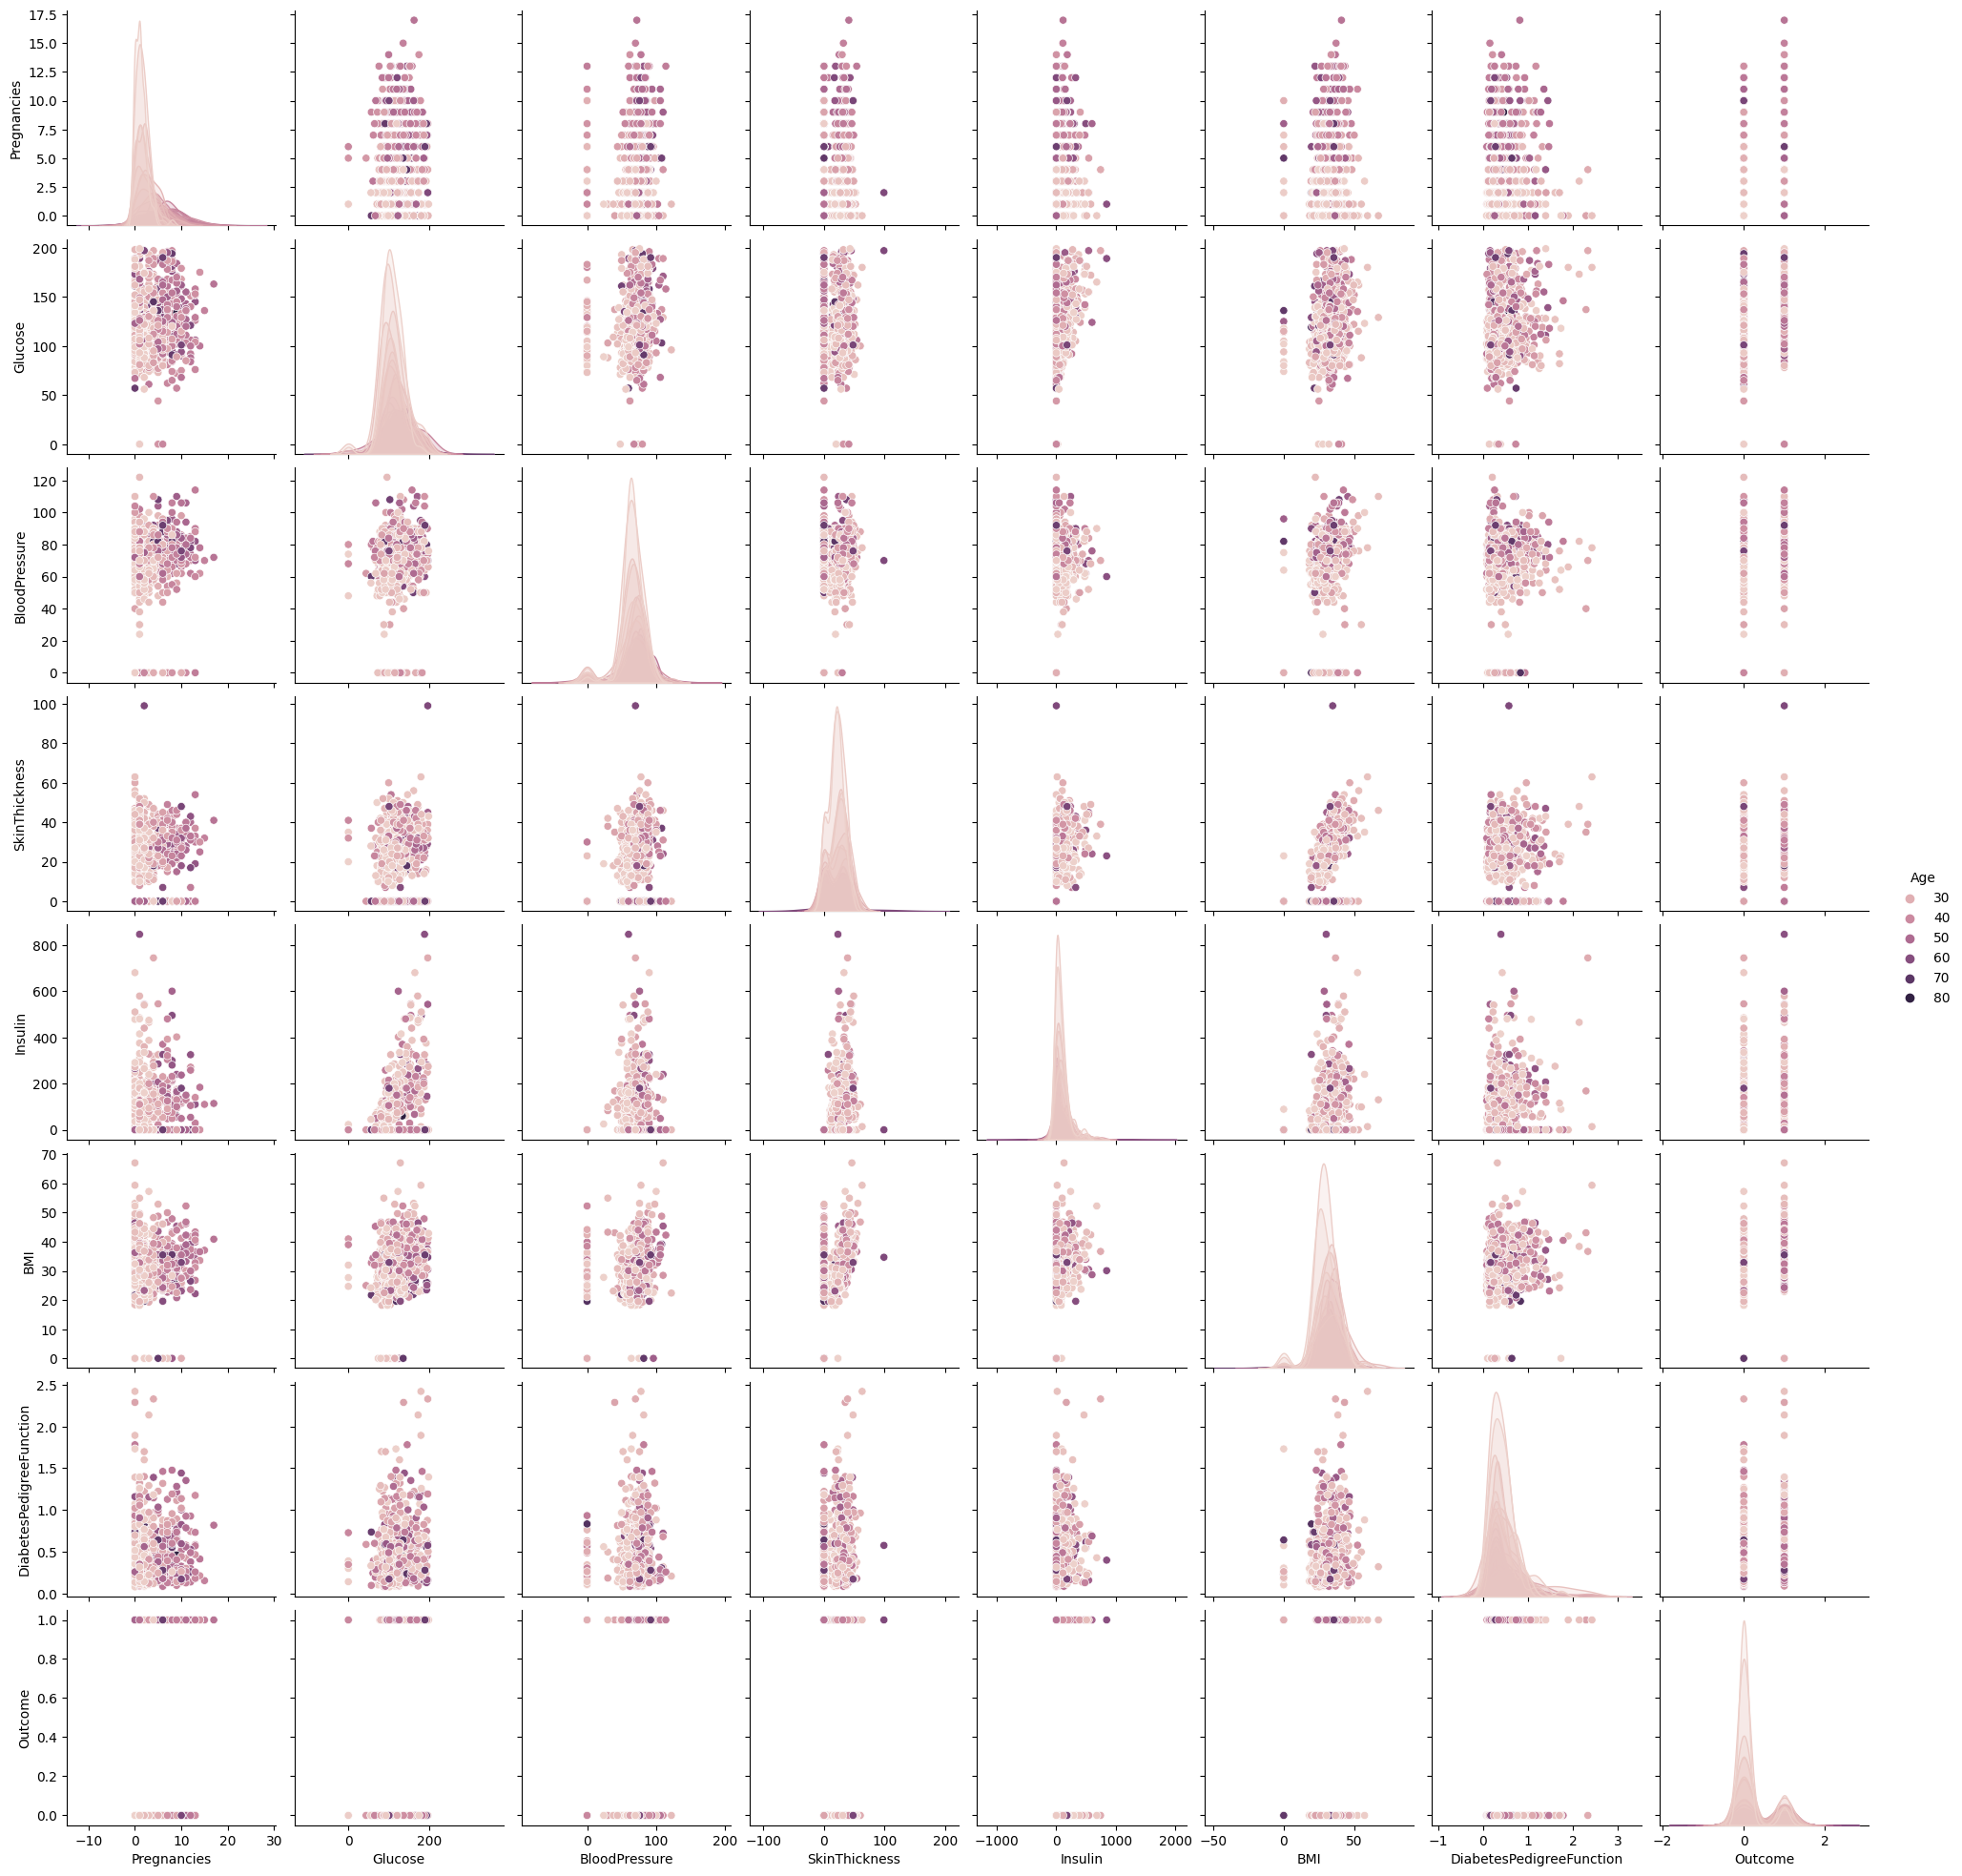

In [15]:
sns.pairplot(dataset,hue='Age')

In [17]:
datanew=dataset[['Pregnancies','SkinThickness', 'BMI']]

In [18]:
corr=dataset[['Pregnancies','SkinThickness', 'BMI']].corr()

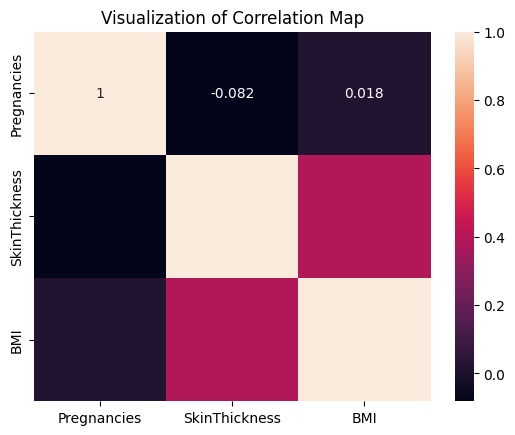

In [19]:
# Visualize the Correlation map
sns.heatmap(corr,annot=True)
plt.title("Visualization of Correlation Map")
plt.show()

In [38]:
datanewAll=dataset[['Pregnancies',"Glucose", 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 
                   'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [39]:
corr=dataset[['Pregnancies',"Glucose", 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 
                   'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr()

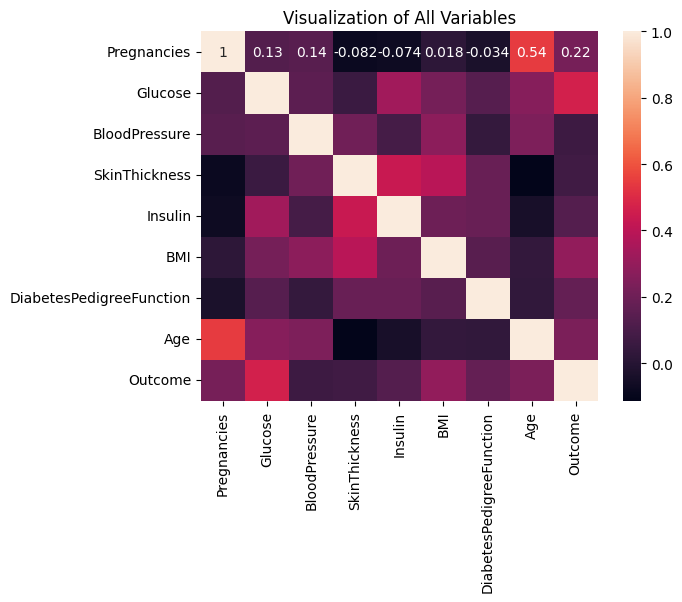

In [40]:
# Visualize the Correlation map
sns.heatmap(corr,annot=True)
plt.title("Visualization of All Variables")
plt.show()

# Explore Data Analysis (EDA Process)

### Number of Times Pregnant

In [21]:
dataset['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

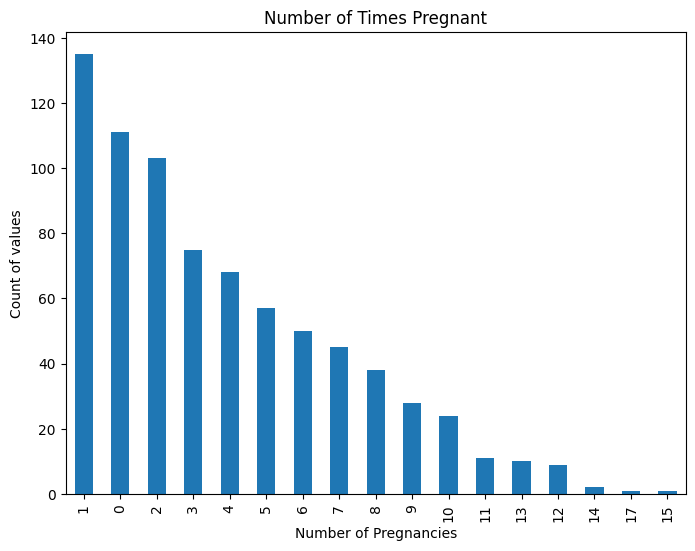

In [37]:
dataset['Pregnancies'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Number of Times Pregnant")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Count of values")
plt.show()

### Glucose

<Axes: xlabel='Glucose', ylabel='Count'>

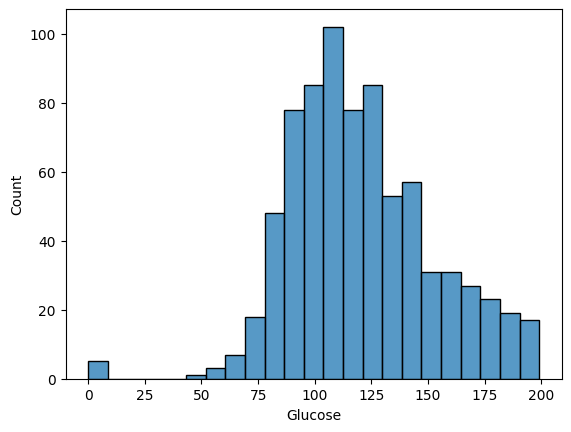

In [63]:
sns.histplot(dataset['Glucose'])

### Blood Pressure

<Axes: xlabel='BloodPressure', ylabel='Count'>

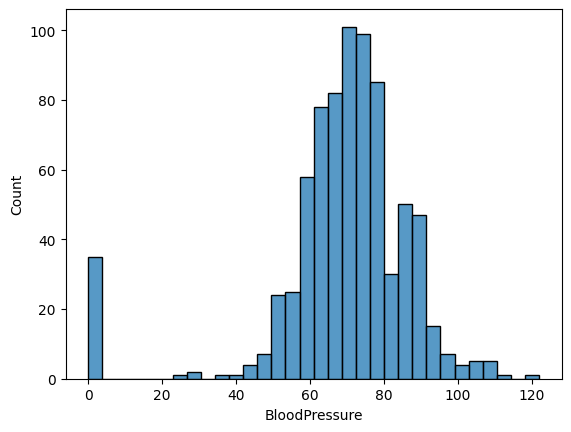

In [64]:
sns.histplot(dataset['BloodPressure'])

### Skin Thickness

<Axes: xlabel='SkinThickness', ylabel='Count'>

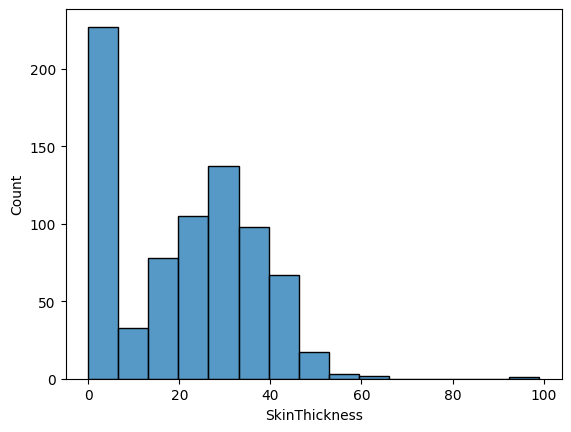

In [67]:
sns.histplot(dataset['SkinThickness'])

### Insulin

<Axes: xlabel='Insulin', ylabel='Count'>

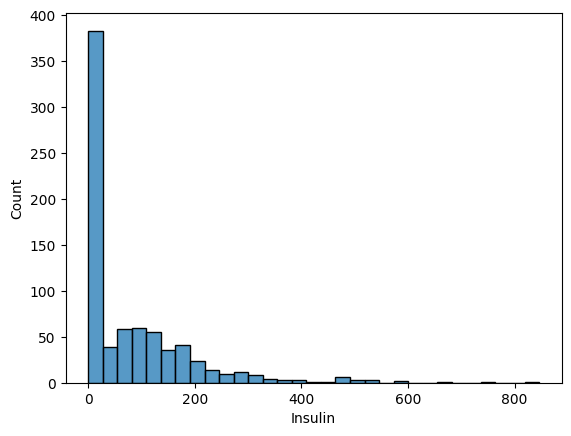

In [68]:
sns.histplot(dataset['Insulin'])

### BMI

<Axes: xlabel='BMI', ylabel='Count'>

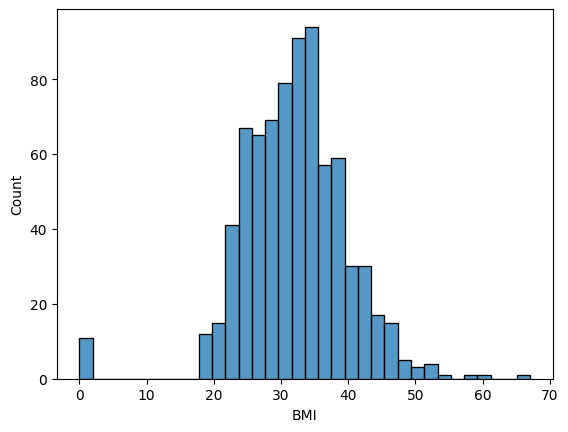

In [69]:
sns.histplot(dataset['BMI'])

### Diabetes Pedigree Function

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

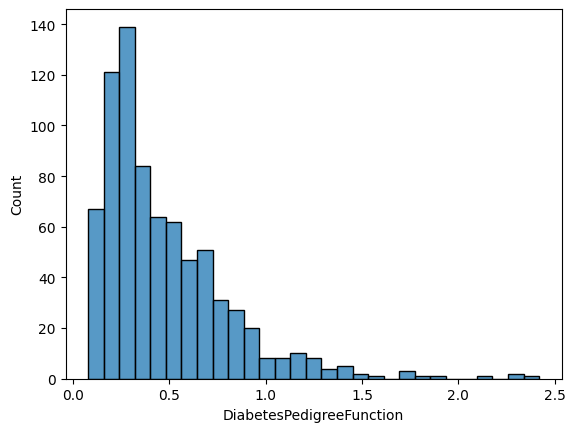

In [70]:
sns.histplot(dataset['DiabetesPedigreeFunction'])

### Age

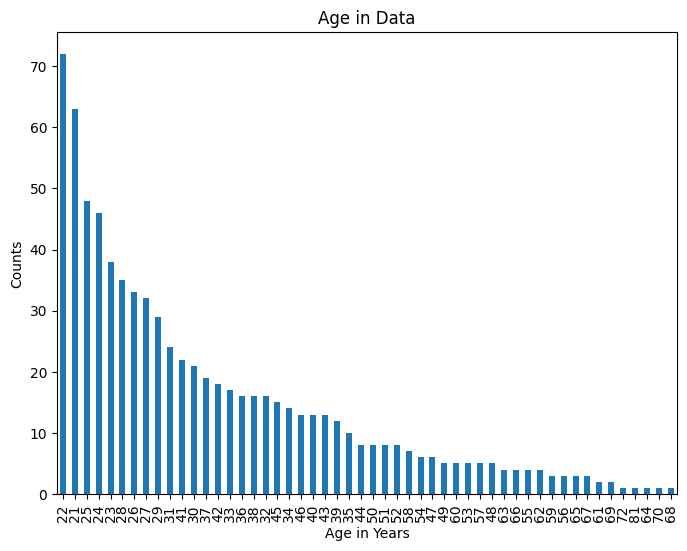

In [62]:
dataset['Age'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Age in Data")
plt.xlabel("Age in Years")
plt.ylabel("Counts")
plt.show()

### Percentage of who have diabetes 

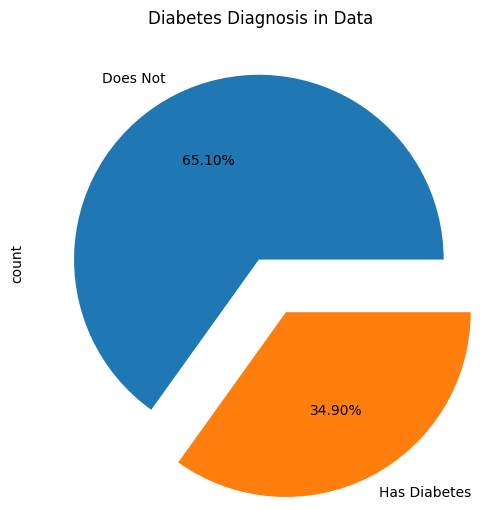

In [28]:
dataset['Outcome'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(8,6),title="Diabetes Diagnosis in Data",explode=[0.02,0.3],
    labels=['Does Not', 'Has Diabetes'],
    autopct='%1.2f%%')
plt.show()

## Logistic Regression - To predict a patient to either have diabetes or does not .

In [71]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Independent and dependent variables to predict

In [72]:
x2=dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
            'DiabetesPedigreeFunction', 'Age']]
y2=dataset['Outcome']

### Splitting the dataset into training and test set

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x2, y2, test_size=.20, random_state=0)

### Training the Linear Regression Model

In [133]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=100)
classifier.fit(X_train.values,y_train)

LogisticRegression()

In [134]:
y_pred= classifier.predict(X_test.values)

### Model Performance Check using Confusion matrix

In [135]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [136]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[98  9]
 [18 29]]


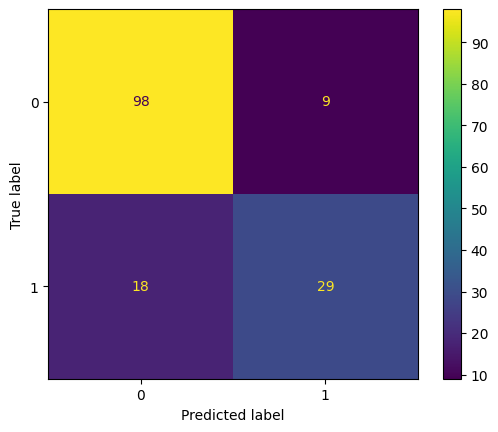

In [137]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

### TN = Not diagnosed with diabetes which the model predicted correctly (98)
### TP = Diagnosed with diabetes with the model predicted correctly (29)
### FP = Actually had no diabetes but model predicted they had diabetes (9)
### FN = Actually had diabetes but the model predicted they did not (18) *Bad*

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



### Accuracy score of 82%

### Splitting the dataset into training and test set

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x2, y2, test_size=.30, random_state=0)

### Training the Linear Regression Model

In [238]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=100)
classifier.fit(X_train.values,y_train)

LogisticRegression()

In [239]:
y_pred= classifier.predict(X_test.values)

### Model Performance Check using Confusion matrix

In [240]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [241]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[141  16]
 [ 35  39]]


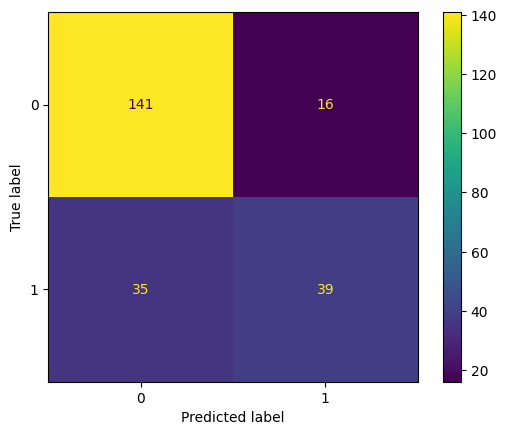

In [242]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

### TN = Not diagnosed with diabetes which the model predicted correctly (141)
### TP = Diagnosed with diabetes with the model predicted correctly (39)
### FP = Actually had no diabetes but model predicted they had diabetes (16)
### FN = Actually had diabetes but the model predicted they did not (35) *Bad* -> Predicted more , worse.

In [243]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



### Accuracy score of 78%

### Splitting the dataset into training and test set

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x2, y2, test_size=.10, random_state=0)

In [231]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=100)
classifier.fit(X_train.values,y_train)

LogisticRegression()

In [232]:
y_pred= classifier.predict(X_test.values)

### Model Performance Check using Confusion matrix

In [233]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [234]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[48  3]
 [ 7 19]]


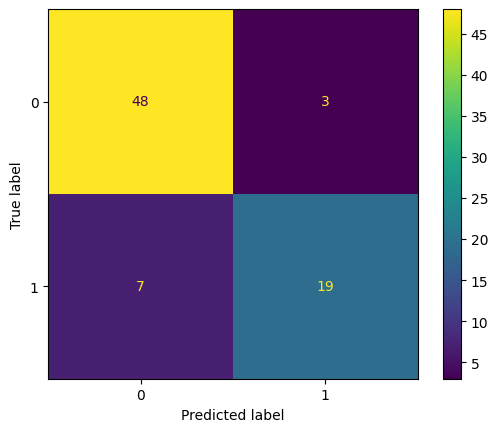

In [235]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

### TN = Not diagnosed with diabetes which the model predicted correctly (48)
### TP = Diagnosed with diabetes with the model predicted correctly (19)
### FP = Actually had no diabetes but model predicted they had diabetes (3)
### FN = Actually had diabetes but the model predicted they did not (7) *Bad* -> Predicted less , better!

In [236]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



### Accuracy score of 87%